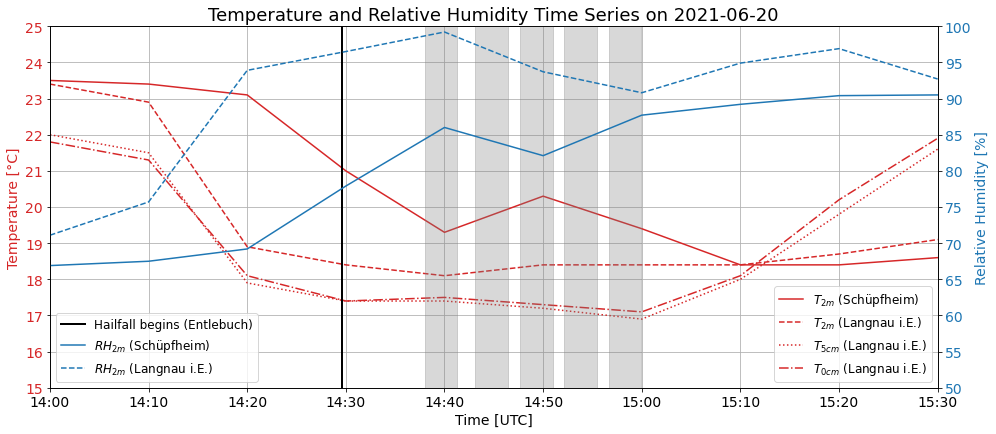

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#Plot averaged (mean) histogram over all 10000 sensors plus result from the real 4 sensors close by
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plot_dir = '/data/hail/plots/'

# Data from the provided LaTeX table
data = {
    'Time': ['2021-06-20 14:00', '2021-06-20 14:10', '2021-06-20 14:20', '2021-06-20 14:30', '2021-06-20 14:40', '2021-06-20 14:50', '2021-06-20 15:00', '2021-06-20 15:10', '2021-06-20 15:20', '2021-06-20 15:30'],
    'T_{2m} (Schüpfheim)': [23.5, 23.4, 23.1, 21.0, 19.3, 20.3, 19.4, 18.4, 18.4, 18.6],
    'RH_{2m} (Schüpfheim)': [66.9, 67.5, 69.2, 77.9, 86.0, 82.1, 87.7, 89.2, 90.4, 90.5],
    'T_{2m} (Langnau i.E.)': [23.4, 22.9, 18.9, 18.4, 18.1, 18.4, 18.4, 18.4, 18.7, 19.1],
    'T_{5cm} (Langnau i.E.)': [22.0, 21.5, 17.9, 17.4, 17.4, 17.2, 16.9, 18.0, 19.8, 21.6],
    'T_{0cm} (Langnau i.E.)': [21.8, 21.3, 18.1, 17.4, 17.5, 17.3, 17.1, 18.1, 20.2, 21.9],
    'RH_{2m} (Langnau i.E.)': [71.1, 75.7, 93.9, 96.5, 99.2, 93.7, 90.8, 94.9, 96.9, 92.7],
}

fight_times = {
    '1': ['2021-06-20 14:37:59','2021-06-20 14:41:19'],
    '2': ['2021-06-20 14:43:06','2021-06-20 14:46:25'],
    '3': ['2021-06-20 14:47:39','2021-06-20 14:50:59'],
    '4': ['2021-06-20 14:52:07','2021-06-20 14:55:27'],
    '5': ['2021-06-20 14:56:38','2021-06-20 14:59:56'],
}    

# Convert the data dictionary to a Pandas DataFrame
df = pd.DataFrame(data)
df['Time'] = pd.to_datetime(df['Time'], format='%Y-%m-%d %H:%M')

# Plotting
fig, ax1 = plt.subplots(figsize=[14,6])

color = 'tab:red'
ax1.set_xlabel('Time [UTC]')
ax1.set_ylabel('Temperature [°C]', color=color)
ax1.plot(df['Time'], df['T_{2m} (Schüpfheim)'], label=r'$T_{2m}$ (Schüpfheim)', color=color)
ax1.plot(df['Time'], df['T_{2m} (Langnau i.E.)'], label=r'$T_{2m}$ (Langnau i.E.)', linestyle='dashed', color=color)
ax1.plot(df['Time'], df['T_{5cm} (Langnau i.E.)'], label=r'$T_{5cm}$ (Langnau i.E.)', linestyle='dotted', color=color)
ax1.plot(df['Time'], df['T_{0cm} (Langnau i.E.)'], label=r'$T_{0cm}$ (Langnau i.E.)', linestyle='dashdot', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_yticks([15,16,17,18,19,20,21,22,23,24,25])
ax1.set_ylim([15,25])
ax1.set_xlim([df['Time'][0],df['Time'][9]])
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax1.grid()
ax1.legend(loc='lower right')

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Relative Humidity [%]', color=color)
# Plot vertical line at 14:29:38
vertical_line_time = pd.to_datetime('2021-06-20 14:29:38', format= '%Y-%m-%d %H:%M:%S')
ax2.axvline(x=vertical_line_time, color='black', linestyle='-', linewidth=2, label='Hailfall begins (Entlebuch)') 

ax2.plot(df['Time'], df['RH_{2m} (Schüpfheim)'], label=r'$RH_{2m}$ (Schüpfheim)', color=color)
ax2.plot(df['Time'], df['RH_{2m} (Langnau i.E.)'], label=r'$RH_{2m}$ (Langnau i.E.)', linestyle='dashed', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_yticks([50,55,60,65,70,75,80,85,90,95,100])
ax2.set_ylim([50,100])


    
ax2.legend(loc='lower left')

for period, (start_time, end_time) in fight_times.items():
    start_time = pd.to_datetime(start_time)
    end_time = pd.to_datetime(end_time)
    ax2.fill_betweenx(y=[ax2.get_ylim()[0], ax2.get_ylim()[1]], x1=start_time, x2=end_time, color='grey', alpha=0.3)


fig.tight_layout()  
plt.title('Temperature and Relative Humidity Time Series on 2021-06-20')
plt.savefig(plot_dir+'T_RH.png',dpi=400,bbox_inches='tight',facecolor='white')

In [58]:
df['Time']

0   2021-06-20 14:00:00
1   2021-06-20 14:10:00
2   2021-06-20 14:20:00
3   2021-06-20 14:30:00
4   2021-06-20 14:40:00
5   2021-06-20 14:50:00
6   2021-06-20 15:00:00
7   2021-06-20 15:10:00
8   2021-06-20 15:20:00
9   2021-06-20 15:30:00
Name: Time, dtype: datetime64[ns]